In [2]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

data = pd.read_csv('data.csv')

In [5]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [9]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [7]:
ids = data['Respondent']
lang_responses = data['LanguageWorkedWith']

In [10]:
lang_responses

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
2                                                 HTML/CSS
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
88878                        HTML/CSS;JavaScript;Other(s):
88879                                                  NaN
88880                                                  NaN
88881                                                  NaN
88882    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [12]:
language_counter = Counter()

In [22]:
for response in lang_responses:
    x= str(response).split(';')
    language_counter.update(x)


In [23]:
language_counter

Counter({'HTML/CSS': 55523,
         'Java': 35944,
         'JavaScript': 59282,
         'Python': 36488,
         'C++': 20554,
         'C': 18029,
         'C#': 27118,
         'SQL': 47598,
         'VBA': 4790,
         'R': 5063,
         'Bash/Shell/PowerShell': 32030,
         'Ruby': 7346,
         'Rust': 2800,
         'TypeScript': 18556,
         'WebAssembly': 1018,
         'Other(s):': 7926,
         'Go': 7207,
         'PHP': 23048,
         'Assembly': 5839,
         'Kotlin': 5623,
         'Swift': 5750,
         'nan': 1314,
         'Objective-C': 4191,
         'Elixir': 1260,
         'Erlang': 777,
         'Clojure': 1254,
         'F#': 973,
         'Scala': 3309,
         'Dart': 1683})

In [27]:
y = language_counter.most_common(15)

In [30]:
y

[('JavaScript', 59282),
 ('HTML/CSS', 55523),
 ('SQL', 47598),
 ('Python', 36488),
 ('Java', 35944),
 ('Bash/Shell/PowerShell', 32030),
 ('C#', 27118),
 ('PHP', 23048),
 ('C++', 20554),
 ('TypeScript', 18556),
 ('C', 18029),
 ('Other(s):', 7926),
 ('Ruby', 7346),
 ('Go', 7207),
 ('Assembly', 5839)]

In [24]:
languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

In [37]:
languages.reverse()
popularity.reverse()



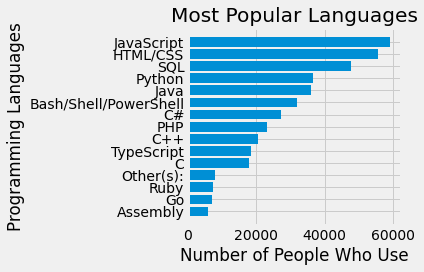

In [38]:
# if we have lot of items it is good for use horizontal bar chart ----> barh

plt.barh(languages,popularity)

plt.title("Most Popular Languages")
plt.ylabel("Programming Languages")
plt.xlabel("Number of People Who Use")

plt.tight_layout()

plt.show()